In [1]:
!pip install -q seaborn numpy pandas matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3, suppress=True)

In [85]:
# filepath = './coral_bleaching_data_2.csv'
filepath = './Preprocessed_Data.csv'
column_names = ['date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_kelvin','temperature_mean','temperature_maximum','temperature_minimum','temperature_kelvin_standard_deviation',	'SSTA_standard_deviation','SSTA_mean','SSTA_minimum','SSTA_maximum','SSTA_frequency','SSTA_frequency_standard_deviation','SSTA_frequency_max','SSTA_frequency_mean','SSTA_DHW','SSTA_DHW_standard_deviation','SSTA_DHWMax','SSTA_DHW_mean','TSA','TSA_standard_deviation','TSA_minimum','TSA_maximum','TSA_mean','TSA_frequency','TSA_frequency_standard_deviation','TSA_frequency_max','TSA_frequency_mean','TSA_DHW','TSA_DHW_standard_deviation','TSA_DHW_max','TSA_DHW_mean','severity_code']
raw_dataset = pd.read_csv(filepath, names=column_names,
                          na_values='', comment='\t',
                          sep=',', skipinitialspace=True)
raw_dataset

/var/folders/w0/_db7fdn14vlcvngdycd9f66r0000gn/T/ipykernel_66791/3969190347.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_dataset = pd.read_csv(filepath, names=column_names,


,date,bleaching_level,depth_meters,clim_SST,temperature_kelvin,temperature_mean,temperature_maximum,temperature_minimum,temperature_kelvin_standard_deviation,SSTA_standard_deviation,SSTA_mean,SSTA_minimum,SSTA_maximum,SSTA_frequency,SSTA_frequency_standard_deviation,SSTA_frequency_max,SSTA_frequency_mean,SSTA_DHW,SSTA_DHW_standard_deviation,SSTA_DHWMax,SSTA_DHW_mean,TSA,TSA_standard_deviation,TSA_minimum,TSA_maximum,TSA_mean,TSA_frequency,TSA_frequency_standard_deviation,TSA_frequency_max,TSA_frequency_mean,TSA_DHW,TSA_DHW_standard_deviation,TSA_DHW_max,TSA_DHW_mean,severity_code
0,2016-8-9,NaN,5.0,299.48,301.30,298.85,304.38,293.85,2.48,0.92,0.0,-3.627778,3.16,33.0,6.56,36.0,6.0,11.50,3.70,22.72,2.48,-0.92,2.48,-8.36,2.15,-3.36,6.0,1.26,6.0,1.0,6.88,0.95,6.88,0.35,Severe (>50% Bleached)
1,2016-2-9,NaN,10.0,299.92,302.17,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,28.0,6.15,31.0,7.0,14.57,3.29,17.68,2.57,-0.03,2.46,-8.06,2.89,-3.26,4.0,1.42,6.0,1.0,8.24,1.44,8.23,0.52,Severe (>50% Bleached)
2,2010-29-6,NaN,5.0,302.20,300.94,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,4.0,6.15,31.0,7.0,0.00,3.29,17.68,2.57,-1.26,2.46,-8.06,2.89,-3.26,0.0,1.42,6.0,1.0,0.00,1.44,8.23,0.52,No Bleaching
3,2008-5-8,NaN,5.0,301.76,300.26,299.09,305.42,293.98,2.42,0.94,0.0,-3.783333,3.17,2.0,5.77,28.0,7.0,1.30,3.24,19.21,2.59,-2.06,2.42,-8.34,3.09,-3.22,0.0,1.21,6.0,1.0,0.00,1.13,7.82,0.42,Moderate (11-50% Bleached)
4,2016-2-9,NaN,13.0,299.86,301.40,298.92,305.51,294.25,2.46,0.96,0.0,-3.438333,3.38,28.0,6.35,30.0,7.0,13.64,3.64,20.40,2.67,-0.80,2.46,-7.94,3.30,-3.27,6.0,1.66,6.0,1.0,10.78,1.65,10.78,0.59,Severe (>50% Bleached)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34841,2016-19-8,NaN,9.9,301.47,304.03,299.73,305.11,294.45,2.39,0.86,0.0,-3.954444,2.65,17.0,4.12,20.0,6.0,1.30,2.51,14.47,1.98,0.95,2.39,-8.63,2.02,-3.34,1.0,0.95,4.0,0.0,0.00,0.62,5.13,0.17,Mild (1-10% Bleached)
34842,2016-6-9,NaN,11.8,300.84,302.35,299.69,305.33,292.80,2.65,0.96,0.0,-3.967778,3.29,21.0,4.49,25.0,7.0,4.37,2.73,15.09,2.53,-0.91,2.65,-10.46,2.06,-3.55,1.0,1.28,5.0,0.0,1.26,0.88,5.76,0.31,Moderate (11-50% Bleached)
34843,2016-6-9,NaN,12.2,300.84,302.44,299.73,306.26,292.72,2.65,0.97,0.0,-3.852222,3.69,19.0,4.46,26.0,7.0,3.14,2.81,14.21,2.62,-0.86,2.65,-10.57,2.96,-3.56,1.0,1.08,5.0,0.0,1.02,0.90,7.03,0.32,Mild (1-10% Bleached)
34844,2016-14-9,NaN,5.5,299.86,304.02,299.67,306.29,292.85,2.83,1.09,0.0,-4.298889,4.08,16.0,4.70,25.0,8.0,1.73,3.26,17.02,3.24,0.65,2.83,-10.51,2.91,-3.69,1.0,1.46,6.0,1.0,1.13,1.18,7.79,0.43,Mild (1-10% Bleached)


In [86]:
dataset = raw_dataset.copy()
dataset.tail()

,date,bleaching_level,depth_meters,clim_SST,temperature_kelvin,temperature_mean,temperature_maximum,temperature_minimum,temperature_kelvin_standard_deviation,SSTA_standard_deviation,SSTA_mean,SSTA_minimum,SSTA_maximum,SSTA_frequency,SSTA_frequency_standard_deviation,SSTA_frequency_max,SSTA_frequency_mean,SSTA_DHW,SSTA_DHW_standard_deviation,SSTA_DHWMax,SSTA_DHW_mean,TSA,TSA_standard_deviation,TSA_minimum,TSA_maximum,TSA_mean,TSA_frequency,TSA_frequency_standard_deviation,TSA_frequency_max,TSA_frequency_mean,TSA_DHW,TSA_DHW_standard_deviation,TSA_DHW_max,TSA_DHW_mean,severity_code
34841,2016-19-8,NaN,9.9,301.47,304.03,299.73,305.11,294.45,2.39,0.86,0.0,-3.954444,2.65,17.0,4.12,20.0,6.0,1.30,2.51,14.47,1.98,0.95,2.39,-8.63,2.02,-3.34,1.0,0.95,4.0,0.0,0.00,0.62,5.13,0.17,Mild (1-10% Bleached)
34842,2016-6-9,NaN,11.8,300.84,302.35,299.69,305.33,292.80,2.65,0.96,0.0,-3.967778,3.29,21.0,4.49,25.0,7.0,4.37,2.73,15.09,2.53,-0.91,2.65,-10.46,2.06,-3.55,1.0,1.28,5.0,0.0,1.26,0.88,5.76,0.31,Moderate (11-50% Bleached)
34843,2016-6-9,NaN,12.2,300.84,302.44,299.73,306.26,292.72,2.65,0.97,0.0,-3.852222,3.69,19.0,4.46,26.0,7.0,3.14,2.81,14.21,2.62,-0.86,2.65,-10.57,2.96,-3.56,1.0,1.08,5.0,0.0,1.02,0.90,7.03,0.32,Mild (1-10% Bleached)
34844,2016-14-9,NaN,5.5,299.86,304.02,299.67,306.29,292.85,2.83,1.09,0.0,-4.298889,4.08,16.0,4.70,25.0,8.0,1.73,3.26,17.02,3.24,0.65,2.83,-10.51,2.91,-3.69,1.0,1.46,6.0,1.0,1.13,1.18,7.79,0.43,Mild (1-10% Bleached)
34845,2016-13-9,NaN,4.2,300.54,302.70,299.80,305.57,293.17,2.52,0.91,0.0,-3.945556,2.96,20.0,4.62,25.0,6.0,4.36,2.58,12.80,2.16,-0.51,2.52,-10.03,2.35,-3.40,0.0,0.99,4.0,0.0,0.00,0.76,6.28,0.22,Moderate (11-50% Bleached)


In [87]:
dataset = pd.get_dummies(dataset, columns=['bleaching_level'], prefix='', prefix_sep='')
dataset = pd.get_dummies(dataset, columns=['severity_code'], prefix='', prefix_sep='')

dataset

,date,depth_meters,clim_SST,temperature_kelvin,temperature_mean,temperature_maximum,temperature_minimum,temperature_kelvin_standard_deviation,SSTA_standard_deviation,SSTA_mean,SSTA_minimum,SSTA_maximum,SSTA_frequency,SSTA_frequency_standard_deviation,SSTA_frequency_max,SSTA_frequency_mean,SSTA_DHW,SSTA_DHW_standard_deviation,SSTA_DHWMax,SSTA_DHW_mean,TSA,TSA_standard_deviation,TSA_minimum,TSA_maximum,TSA_mean,TSA_frequency,TSA_frequency_standard_deviation,TSA_frequency_max,TSA_frequency_mean,TSA_DHW,TSA_DHW_standard_deviation,TSA_DHW_max,TSA_DHW_mean,Colony,Population,% unknown,Mild (1-10% Bleached),Moderate (11-50% Bleached),No Bleaching,Severe (>50% Bleached)
0,2016-8-9,5.0,299.48,301.30,298.85,304.38,293.85,2.48,0.92,0.0,-3.627778,3.16,33.0,6.56,36.0,6.0,11.50,3.70,22.72,2.48,-0.92,2.48,-8.36,2.15,-3.36,6.0,1.26,6.0,1.0,6.88,0.95,6.88,0.35,False,False,False,False,False,False,True
1,2016-2-9,10.0,299.92,302.17,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,28.0,6.15,31.0,7.0,14.57,3.29,17.68,2.57,-0.03,2.46,-8.06,2.89,-3.26,4.0,1.42,6.0,1.0,8.24,1.44,8.23,0.52,False,False,False,False,False,False,True
2,2010-29-6,5.0,302.20,300.94,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,4.0,6.15,31.0,7.0,0.00,3.29,17.68,2.57,-1.26,2.46,-8.06,2.89,-3.26,0.0,1.42,6.0,1.0,0.00,1.44,8.23,0.52,False,False,False,False,False,True,False
3,2008-5-8,5.0,301.76,300.26,299.09,305.42,293.98,2.42,0.94,0.0,-3.783333,3.17,2.0,5.77,28.0,7.0,1.30,3.24,19.21,2.59,-2.06,2.42,-8.34,3.09,-3.22,0.0,1.21,6.0,1.0,0.00,1.13,7.82,0.42,False,False,False,False,True,False,False
4,2016-2-9,13.0,299.86,301.40,298.92,305.51,294.25,2.46,0.96,0.0,-3.438333,3.38,28.0,6.35,30.0,7.0,13.64,3.64,20.40,2.67,-0.80,2.46,-7.94,3.30,-3.27,6.0,1.66,6.0,1.0,10.78,1.65,10.78,0.59,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34841,2016-19-8,9.9,301.47,304.03,299.73,305.11,294.45,2.39,0.86,0.0,-3.954444,2.65,17.0,4.12,20.0,6.0,1.30,2.51,14.47,1.98,0.95,2.39,-8.63,2.02,-3.34,1.0,0.95,4.0,0.0,0.00,0.62,5.13,0.17,False,False,False,True,False,False,False
34842,2016-6-9,11.8,300.84,302.35,299.69,305.33,292.80,2.65,0.96,0.0,-3.967778,3.29,21.0,4.49,25.0,7.0,4.37,2.73,15.09,2.53,-0.91,2.65,-10.46,2.06,-3.55,1.0,1.28,5.0,0.0,1.26,0.88,5.76,0.31,False,False,False,False,True,False,False
34843,2016-6-9,12.2,300.84,302.44,299.73,306.26,292.72,2.65,0.97,0.0,-3.852222,3.69,19.0,4.46,26.0,7.0,3.14,2.81,14.21,2.62,-0.86,2.65,-10.57,2.96,-3.56,1.0,1.08,5.0,0.0,1.02,0.90,7.03,0.32,False,False,False,True,False,False,False
34844,2016-14-9,5.5,299.86,304.02,299.67,306.29,292.85,2.83,1.09,0.0,-4.298889,4.08,16.0,4.70,25.0,8.0,1.73,3.26,17.02,3.24,0.65,2.83,-10.51,2.91,-3.69,1.0,1.46,6.0,1.0,1.13,1.18,7.79,0.43,False,False,False,True,False,False,False


In [88]:
dataset.isna().sum()

date                                       0
depth_meters                               0
clim_SST                                  98
temperature_kelvin                       129
temperature_mean                         113
temperature_maximum                      113
temperature_minimum                      113
temperature_kelvin_standard_deviation    113
SSTA_standard_deviation                  113
SSTA_mean                                113
SSTA_minimum                             149
SSTA_maximum                             113
SSTA_frequency                           129
SSTA_frequency_standard_deviation        113
SSTA_frequency_max                       113
SSTA_frequency_mean                      113
SSTA_DHW                                 129
SSTA_DHW_standard_deviation              113
SSTA_DHWMax                              113
SSTA_DHW_mean                            113
TSA                                      129
TSA_standard_deviation                   113
TSA_minimu

In [89]:
dataset = dataset.dropna()
dataset

,date,depth_meters,clim_SST,temperature_kelvin,temperature_mean,temperature_maximum,temperature_minimum,temperature_kelvin_standard_deviation,SSTA_standard_deviation,SSTA_mean,SSTA_minimum,SSTA_maximum,SSTA_frequency,SSTA_frequency_standard_deviation,SSTA_frequency_max,SSTA_frequency_mean,SSTA_DHW,SSTA_DHW_standard_deviation,SSTA_DHWMax,SSTA_DHW_mean,TSA,TSA_standard_deviation,TSA_minimum,TSA_maximum,TSA_mean,TSA_frequency,TSA_frequency_standard_deviation,TSA_frequency_max,TSA_frequency_mean,TSA_DHW,TSA_DHW_standard_deviation,TSA_DHW_max,TSA_DHW_mean,Colony,Population,% unknown,Mild (1-10% Bleached),Moderate (11-50% Bleached),No Bleaching,Severe (>50% Bleached)
0,2016-8-9,5.0,299.48,301.30,298.85,304.38,293.85,2.48,0.92,0.0,-3.627778,3.16,33.0,6.56,36.0,6.0,11.50,3.70,22.72,2.48,-0.92,2.48,-8.36,2.15,-3.36,6.0,1.26,6.0,1.0,6.88,0.95,6.88,0.35,False,False,False,False,False,False,True
1,2016-2-9,10.0,299.92,302.17,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,28.0,6.15,31.0,7.0,14.57,3.29,17.68,2.57,-0.03,2.46,-8.06,2.89,-3.26,4.0,1.42,6.0,1.0,8.24,1.44,8.23,0.52,False,False,False,False,False,False,True
2,2010-29-6,5.0,302.20,300.94,298.93,305.10,294.13,2.46,0.93,0.0,-3.322857,3.05,4.0,6.15,31.0,7.0,0.00,3.29,17.68,2.57,-1.26,2.46,-8.06,2.89,-3.26,0.0,1.42,6.0,1.0,0.00,1.44,8.23,0.52,False,False,False,False,False,True,False
3,2008-5-8,5.0,301.76,300.26,299.09,305.42,293.98,2.42,0.94,0.0,-3.783333,3.17,2.0,5.77,28.0,7.0,1.30,3.24,19.21,2.59,-2.06,2.42,-8.34,3.09,-3.22,0.0,1.21,6.0,1.0,0.00,1.13,7.82,0.42,False,False,False,False,True,False,False
4,2016-2-9,13.0,299.86,301.40,298.92,305.51,294.25,2.46,0.96,0.0,-3.438333,3.38,28.0,6.35,30.0,7.0,13.64,3.64,20.40,2.67,-0.80,2.46,-7.94,3.30,-3.27,6.0,1.66,6.0,1.0,10.78,1.65,10.78,0.59,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34841,2016-19-8,9.9,301.47,304.03,299.73,305.11,294.45,2.39,0.86,0.0,-3.954444,2.65,17.0,4.12,20.0,6.0,1.30,2.51,14.47,1.98,0.95,2.39,-8.63,2.02,-3.34,1.0,0.95,4.0,0.0,0.00,0.62,5.13,0.17,False,False,False,True,False,False,False
34842,2016-6-9,11.8,300.84,302.35,299.69,305.33,292.80,2.65,0.96,0.0,-3.967778,3.29,21.0,4.49,25.0,7.0,4.37,2.73,15.09,2.53,-0.91,2.65,-10.46,2.06,-3.55,1.0,1.28,5.0,0.0,1.26,0.88,5.76,0.31,False,False,False,False,True,False,False
34843,2016-6-9,12.2,300.84,302.44,299.73,306.26,292.72,2.65,0.97,0.0,-3.852222,3.69,19.0,4.46,26.0,7.0,3.14,2.81,14.21,2.62,-0.86,2.65,-10.57,2.96,-3.56,1.0,1.08,5.0,0.0,1.02,0.90,7.03,0.32,False,False,False,True,False,False,False
34844,2016-14-9,5.5,299.86,304.02,299.67,306.29,292.85,2.83,1.09,0.0,-4.298889,4.08,16.0,4.70,25.0,8.0,1.73,3.26,17.02,3.24,0.65,2.83,-10.51,2.91,-3.69,1.0,1.46,6.0,1.0,1.13,1.18,7.79,0.43,False,False,False,True,False,False,False


In [90]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


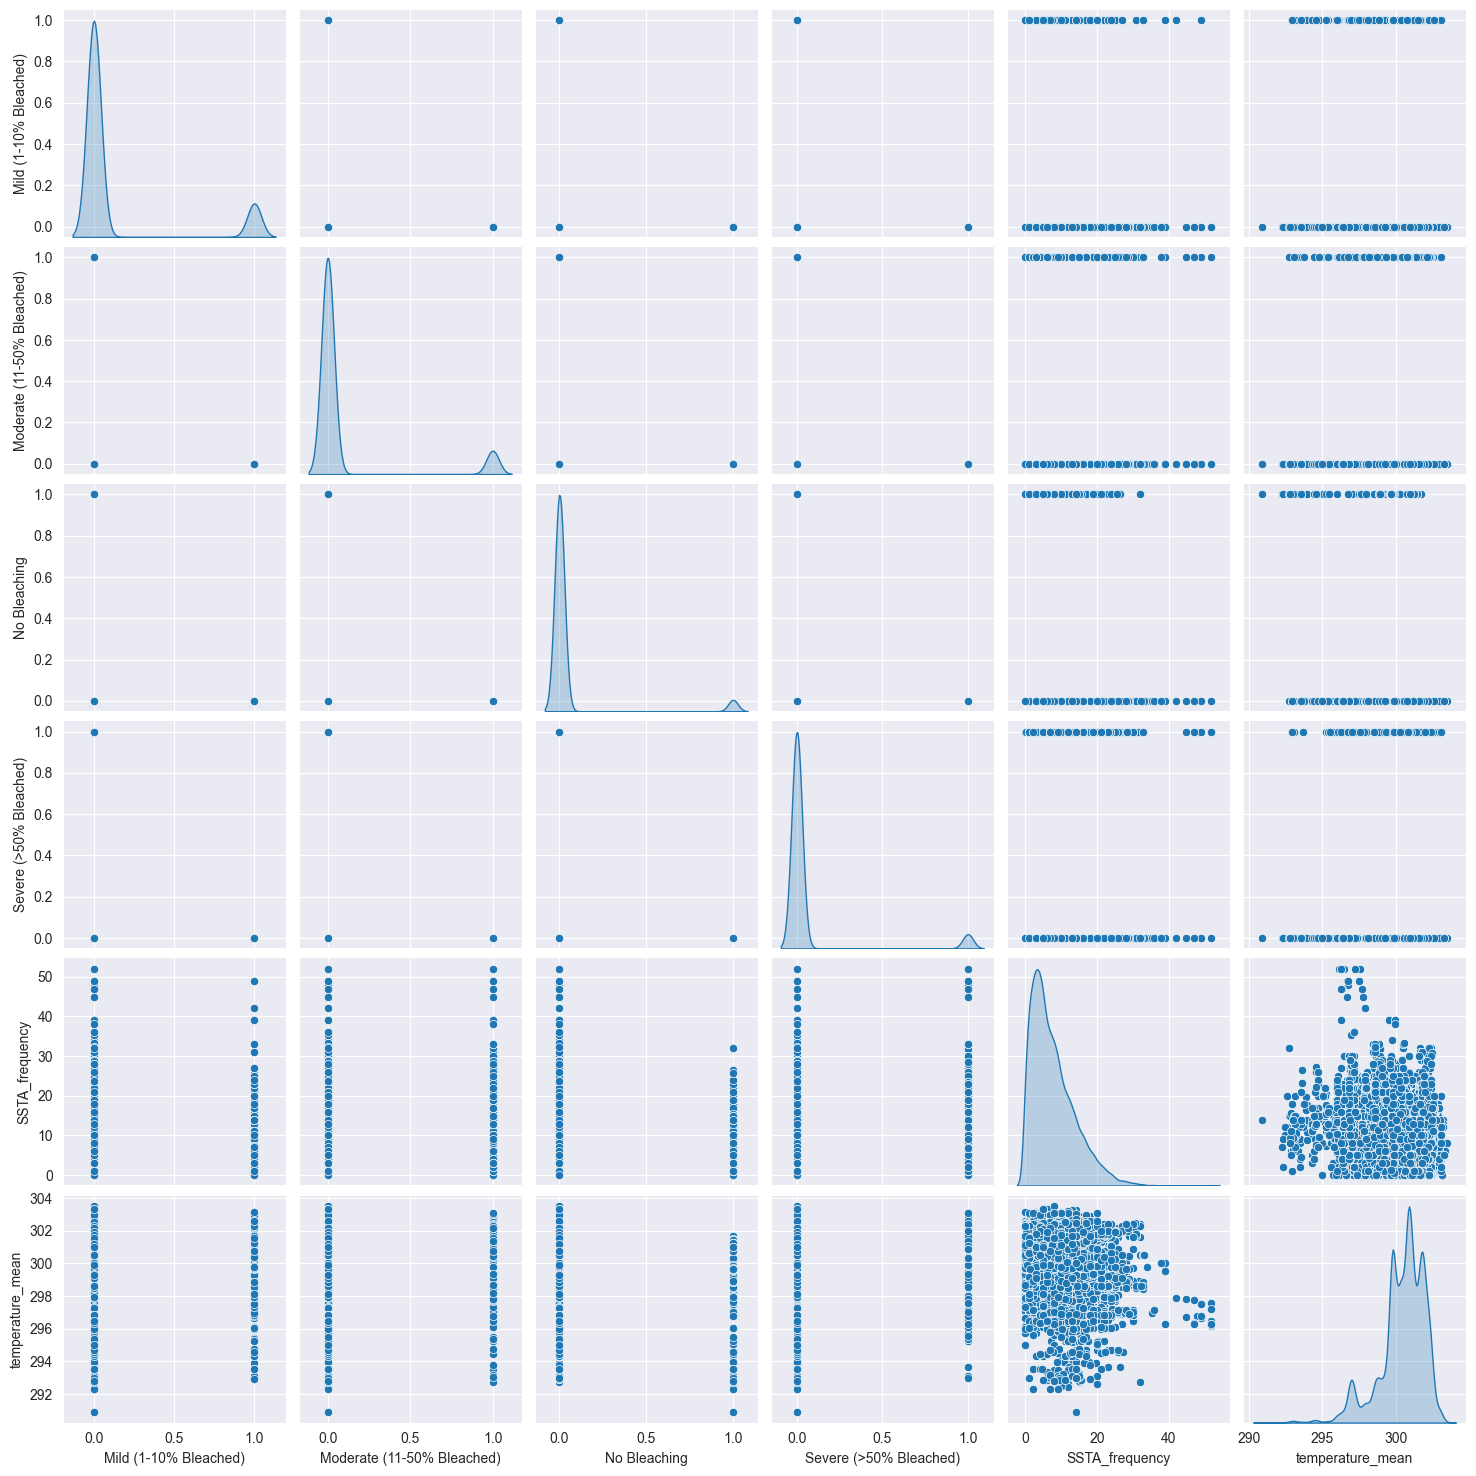

In [91]:
sns.pairplot(train_dataset[['Mild (1-10% Bleached)', 'Moderate (11-50% Bleached)', 'No Bleaching', 'Severe (>50% Bleached)', 'SSTA_frequency', 'temperature_mean', 'date']], diag_kind='kde')


In [93]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

train_dataset.describe().transpose()
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


,mean,std
depth_meters,6.656535,4.559151
clim_SST,294.157636,14.824339
temperature_kelvin,301.383361,1.975220
temperature_mean,300.439952,1.531927
temperature_maximum,305.142717,1.300901
temperature_minimum,295.854503,2.605908
temperature_kelvin_standard_deviation,1.660647,0.711598
SSTA_standard_deviation,0.906269,0.229643
SSTA_mean,0.000000,0.000000
SSTA_minimum,-3.495429,0.623140
